In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Estos son los ejemplos que le introducimos a la red neuronal (entradas y salidas que deben casar)
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
farenheit = np.array([-40,14,32,46,59,72,100], dtype=float)

In [ ]:
# Keras, ayuda a hacer fácilmente las redes neuronales
# Una capa densa es la que tiene conexiones de cada neurona a todas las neuronas de la siguiente capa
#(número de capas, número de neuronas de entrada)
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# Modelo secuencial
modelo = tf.keras.Sequential([capa])

In [ ]:
# Optimizador Adam -> Cómo ajustar los pesos y sesgos para que no "desaprenda"
# La tasa de aprendizaje -> indica cuánto ajustar los pesos y sesgos; y, debe ser baja para que los modifique poco a poco
modelo.compile(
  optimizer = tf.keras.optimizers.Adam(0.1),
  loss='mean_squared_error'
)
# Error cuadrático medio: Un error grande es peor que muchos errores pequeños
# Función de pérdida

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, farenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento...
Modelo entrenado


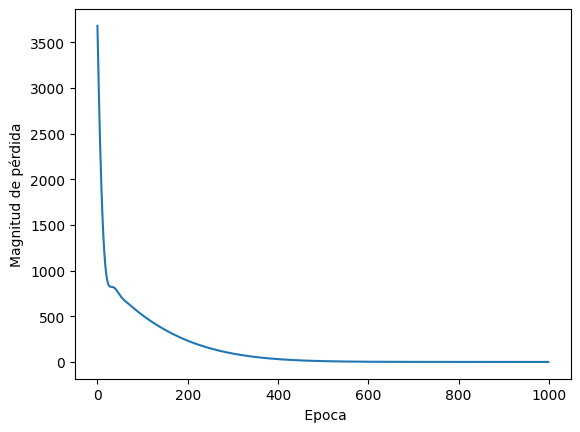

In [ ]:
# Vemos la función de pérdida: Comprueba cuánto de malos son los errores en cada época
import matplotlib.pyplot as plt
plt.xlabel(" Epoca")
plt.ylabel( "Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
### Vemos que a partir de la época 500 casi no aprende.

In [ ]:
print("Hagamos una predicción...!")
resultado = modelo.predict([100.0])
print("El resultado es "+ str(resultado) + " farenheit!")

Hagamos una predicción...!
1/1 [==============================] - 0s 75ms/step
El resultado es [[211.74281]] farenheit!


In [ ]:
# Para ver las variables internas del modelo utilizamos:
print(capa.get_weights())

[array([[1.7982234]], dtype=float32), array([31.920477], dtype=float32)]


In [ ]:
# Ahora, creamos una segunda red neuronal. Esta vez con dos capas ocultas
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3, input_shape=[1])
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [ ]:
modelo.compile(
  optimizer = tf.keras.optimizers.Adam(0.1),
  loss='mean_squared_error'
)

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, farenheit, epochs=1000, verbose=False)
print("Modelo entrenado")

Comenzando entrenamiento...
Modelo entrenado


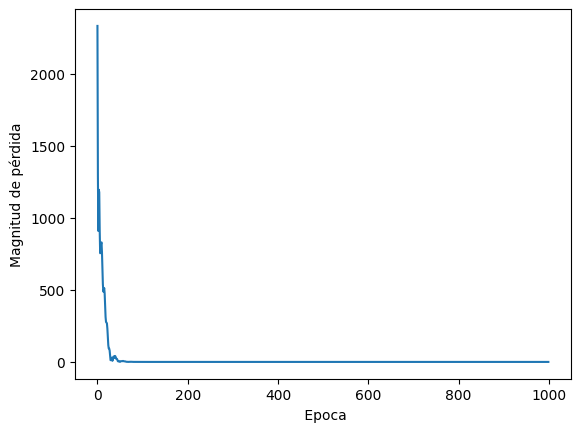

In [ ]:
# Vemos la función de pérdida: Comprueba cuánto de malos son los errores en cada época
import matplotlib.pyplot as plt
plt.xlabel(" Epoca")
plt.ylabel( "Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
# Vemos que a partir de la época 20 o 30 casi no aprende.
# También vemos que cuanto más compleja es la red neuronal, antes nos da buenos resultados.

In [ ]:
print("Hagamos una predicción...!")
resultado = modelo.predict([100.0])
print("El resultado es "+ str(resultado) + " farenheit!")

Hagamos una predicción...!
1/1 [==============================] - 0s 54ms/step
El resultado es [[211.74747]] farenheit!


In [ ]:
# Para ver las variables internas del modelo utilizamos:
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

[array([[-0.4774624 , -0.39715105,  0.23783459]], dtype=float32), array([-3.064467 , -3.2060816, -2.5184011], dtype=float32)]
[array([[-1.237139  ,  0.9755646 ,  0.5290064 ],
       [ 0.48722845,  1.2644901 ,  1.0278522 ],
       [ 0.32766947,  0.8451002 ,  1.0643821 ]], dtype=float32), array([ 2.638994 , -3.1075888, -3.1940238], dtype=float32)]
[array([[ 0.68721735],
       [-1.5976714 ],
       [-0.6035523 ]], dtype=float32), array([3.0425649], dtype=float32)]


In [ ]:
# No podemos entender, a priori, por qué asigna esos pesos y sesgos pero son los que ha encontrado que se adaptan más al resultado.